In [1]:
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

## converting the wav files in to a machine readable format

In [2]:
list_of_sounds = []

In [3]:
forward = []
back = []
left = []
right = []
stop = []

In [4]:
def audio_array(mylist,address):
    files = librosa.util.find_files("C:/Users/Asus/Desktop/recordings/{}".format(address),ext = ['wav'])
    files = np.asarray(files)
    for audio in files:
        sound,sample_rate = librosa.load(audio,sr=16000,res_type='kaiser_fast')
        mylist.append([sound,address])

In [5]:
audio_array(forward,"Forward")
audio_array(back,"back")
audio_array(left,"Left")
audio_array(right,"Right")
audio_array(stop,"Stop")

# understanding the audio by visualising it

In [6]:
import librosa.display
def show_plot(sample):
    x = sample[0]
    plt.figure(figsize=(12,4))
    librosa.display.waveplot(x, sr=16000)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(20, 15))
    librosa.display.specshow(Xdb, sr=16000, x_axis='time', y_axis='hz')
    plt.colorbar()

## wave plot and spectrogram of the sound "forward"

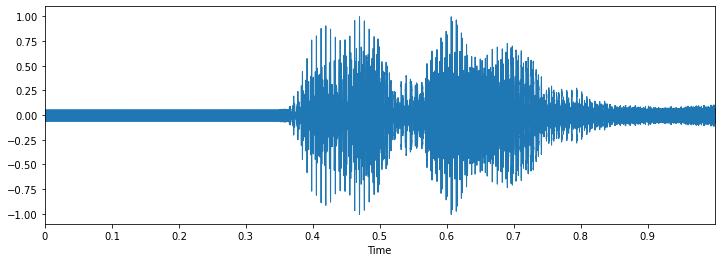

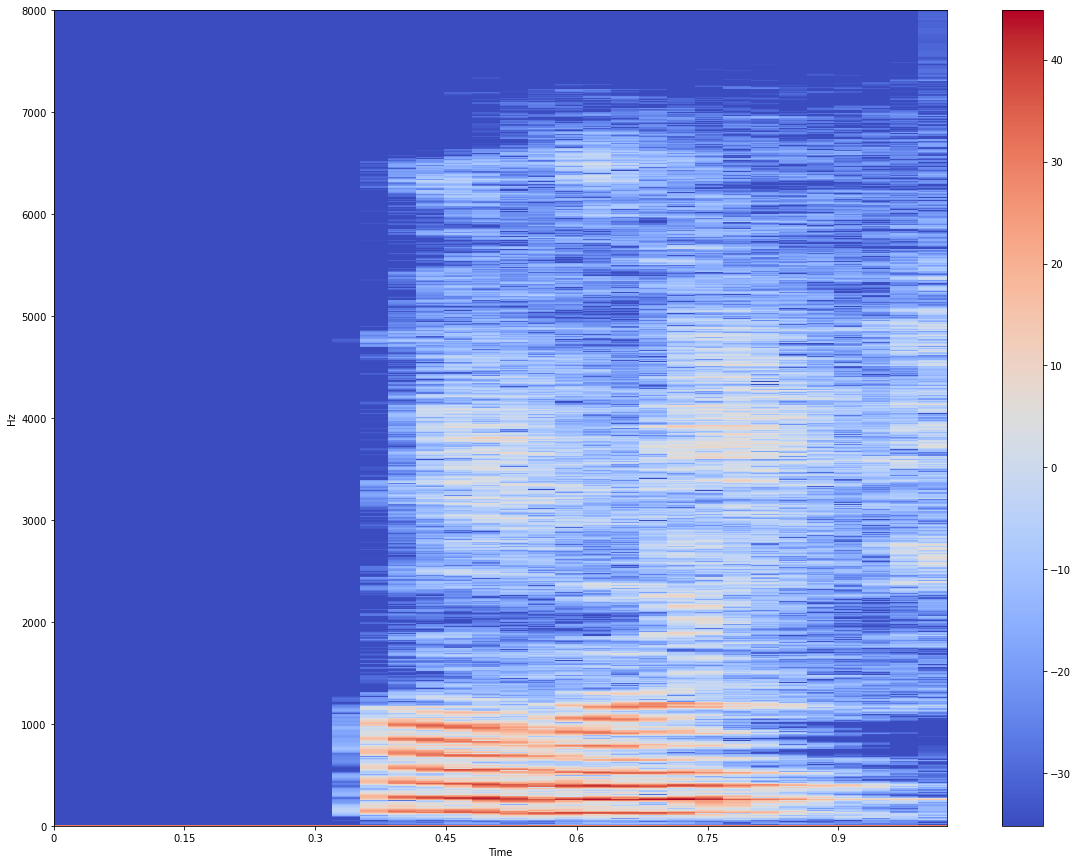

In [7]:
show_plot(forward[0])

## wave plot and spectrogram of the sound "Back"

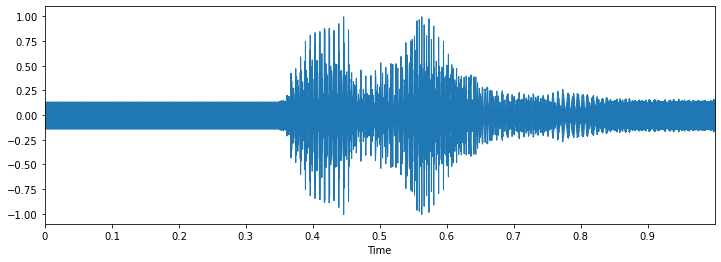

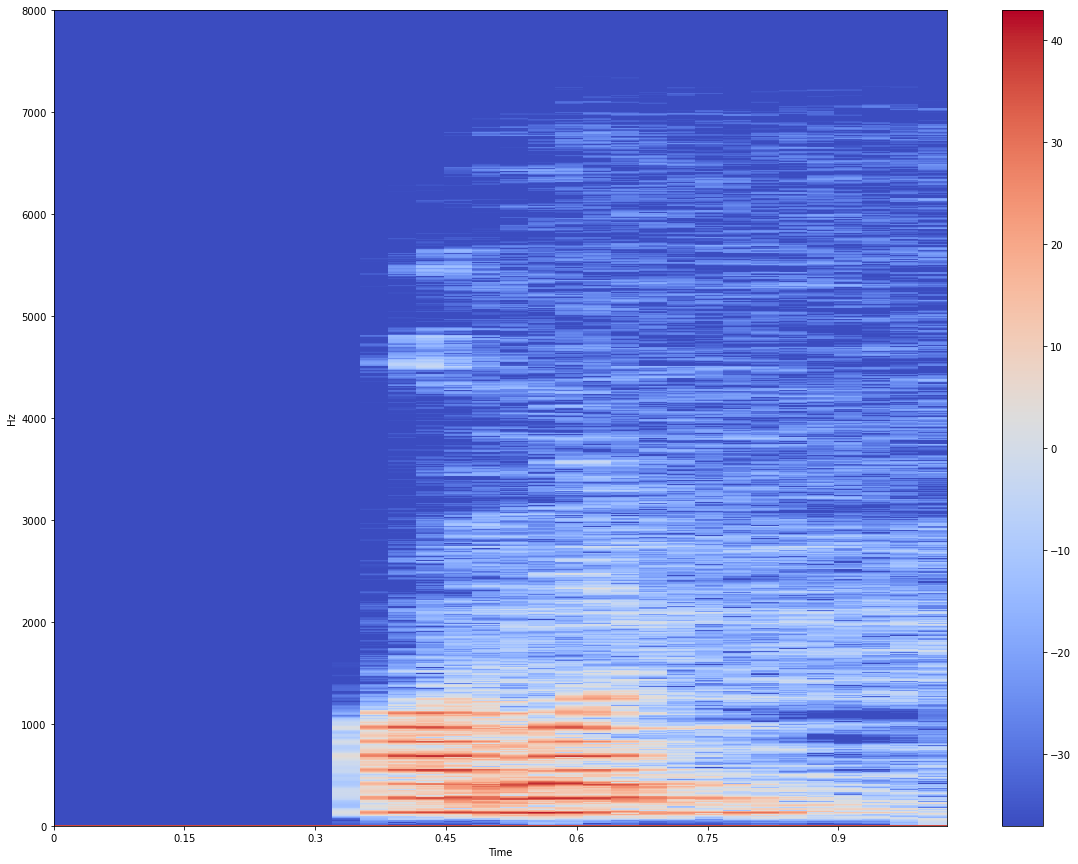

In [8]:
show_plot(back[0])

## wave plot and spectrogram of the sound "Left"

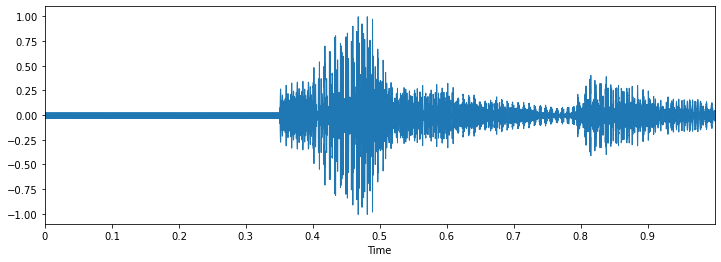

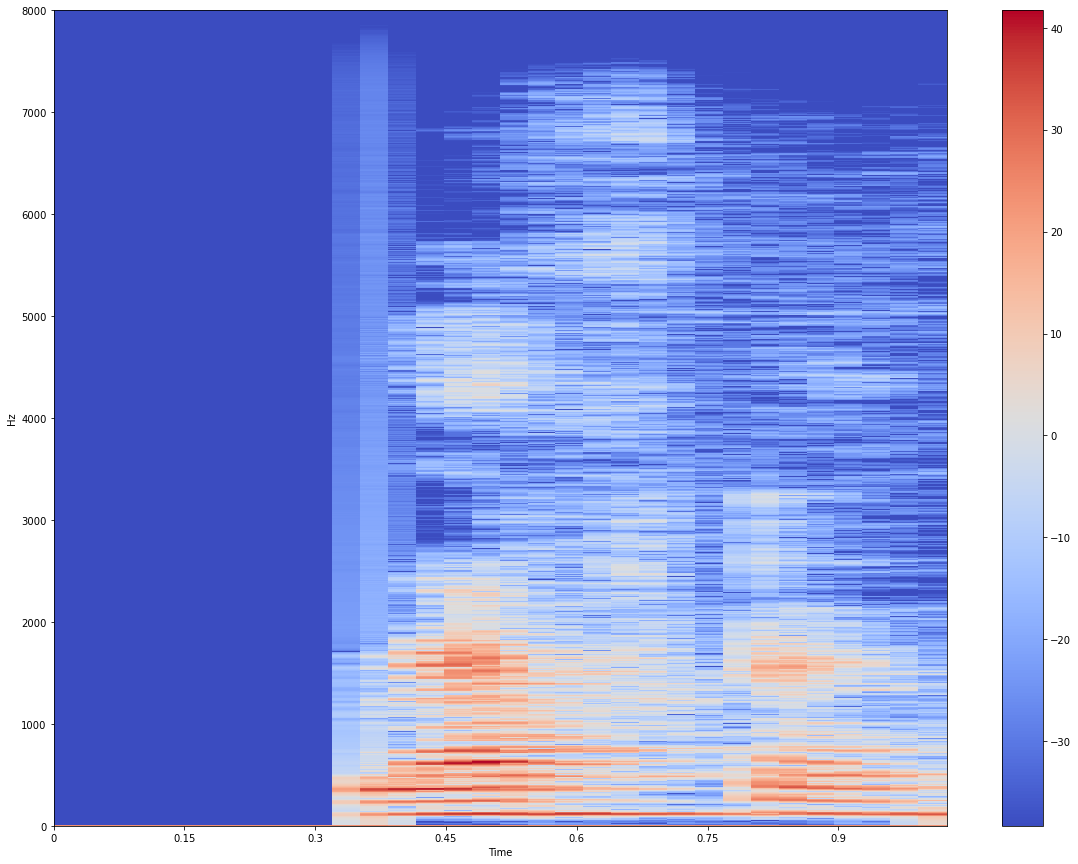

In [9]:
show_plot(left[4])

## wave plot and spectrogram of the sound "Right"

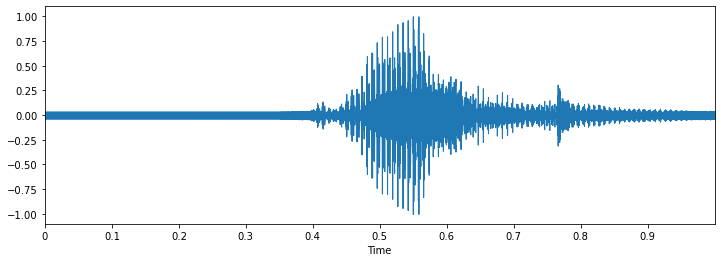

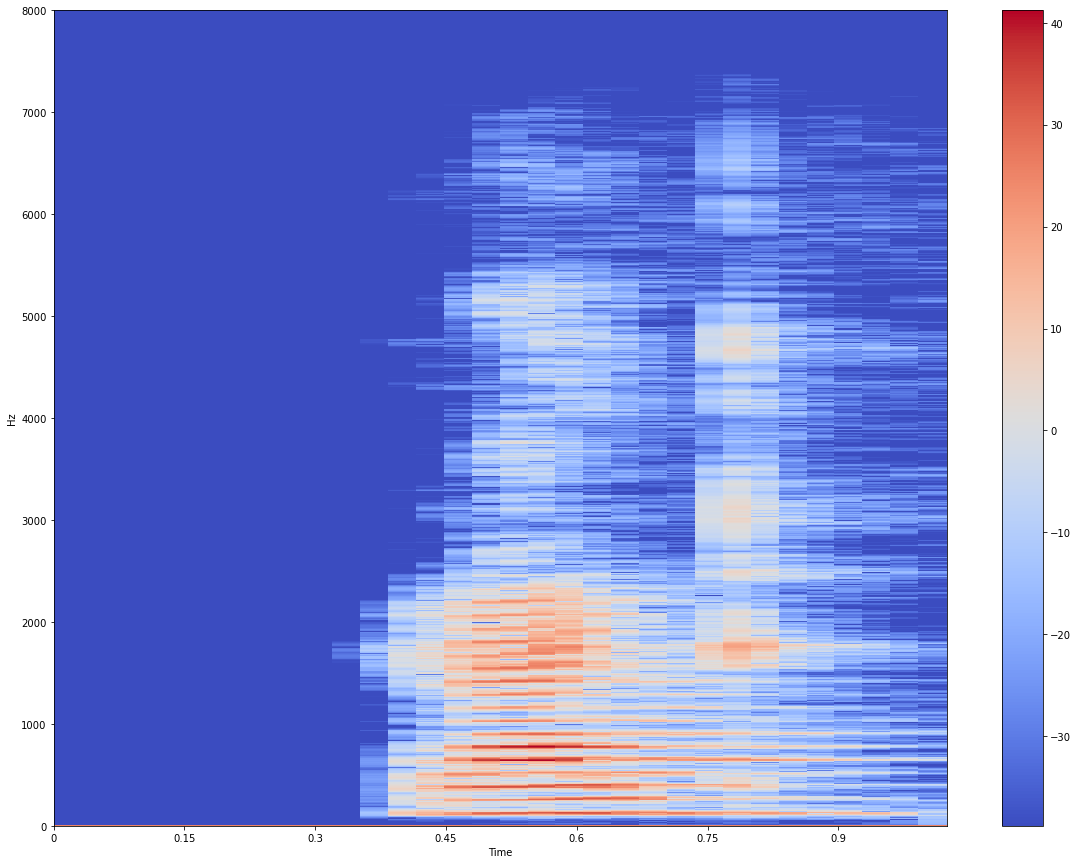

In [10]:
show_plot(right[0])

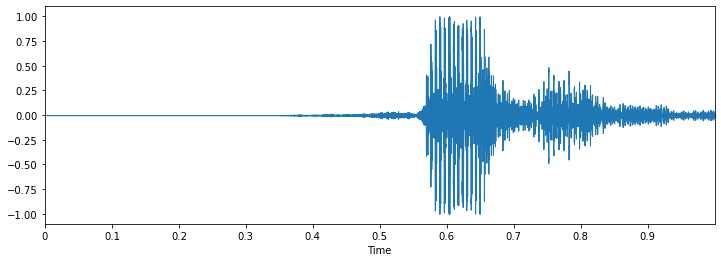

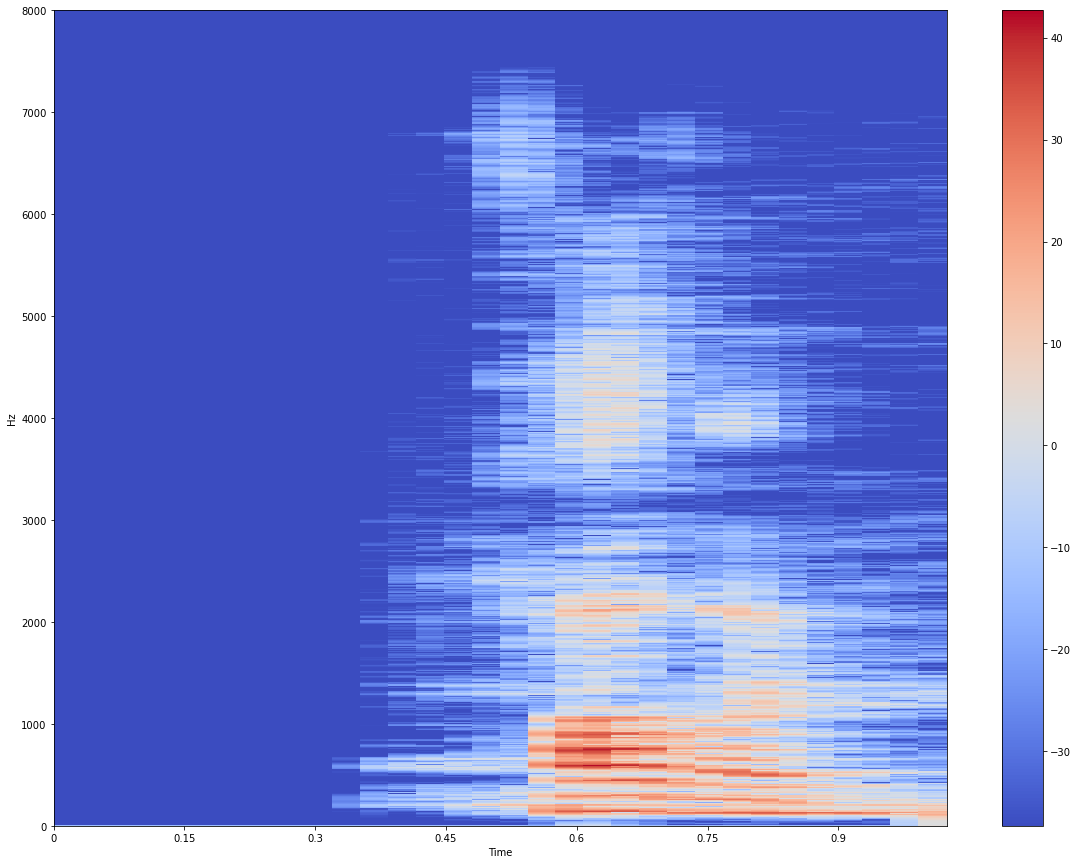

In [11]:
show_plot(stop[0])

## preprocessing of audio

### Normalization

In [12]:
import sklearn.preprocessing
def normalize(x):
    return sklearn.preprocessing.minmax_scale(x, axis=0)

In [13]:
for item in forward:
    item[0] = normalize(item[0])

In [14]:
for item in back:
    item[0] = normalize(item[0])

In [15]:
for item in left:
    item[0] = normalize(item[0])

In [16]:
for item in right:
    item[0] = normalize(item[0])

In [17]:
for item in stop:
    item[0] = normalize(item[0])

## Pre-emphasis

In [18]:
def preemp(soundList):
    for item in soundList:
        item[0] = librosa.effects.preemphasis(item[0])

In [19]:
preemp(forward)
preemp(back)
preemp(left)
preemp(right)
preemp(stop)

# now plotting the audio again and obeserving the changes

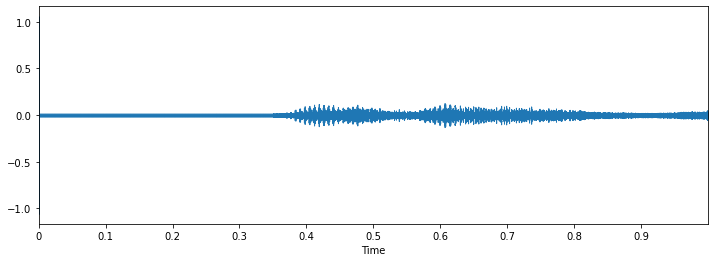

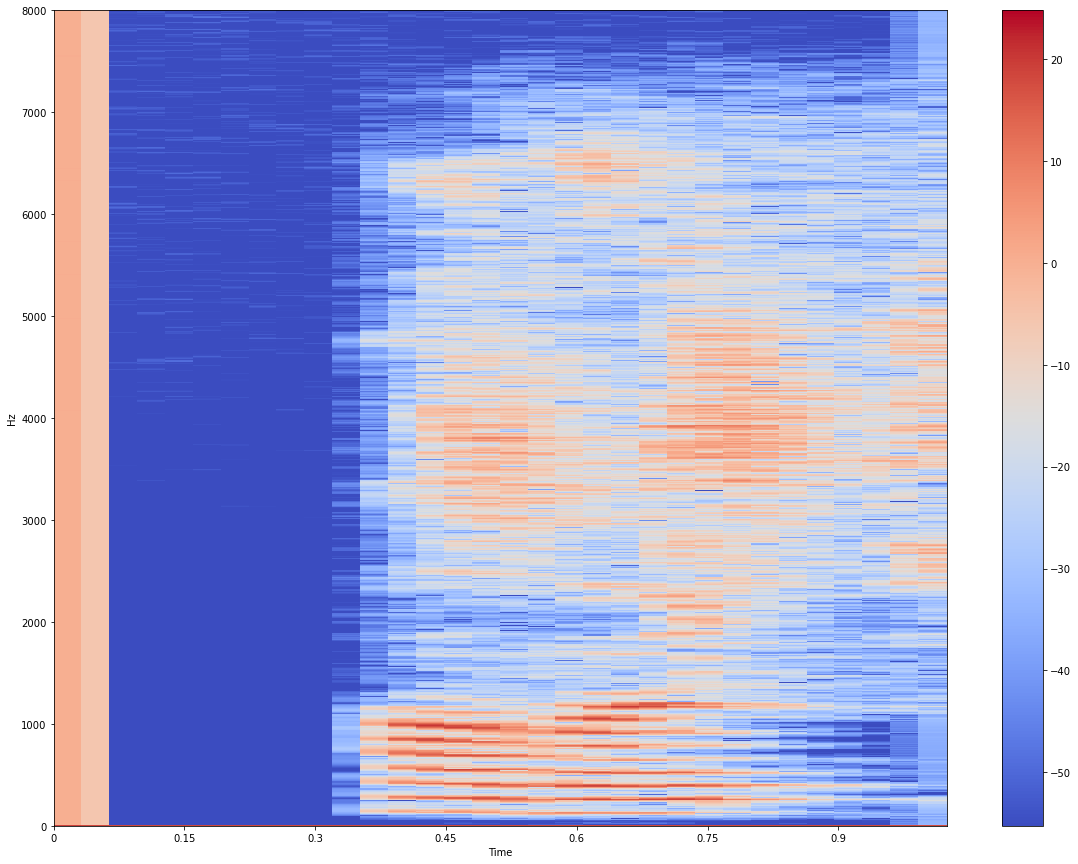

In [20]:
show_plot(forward[0])

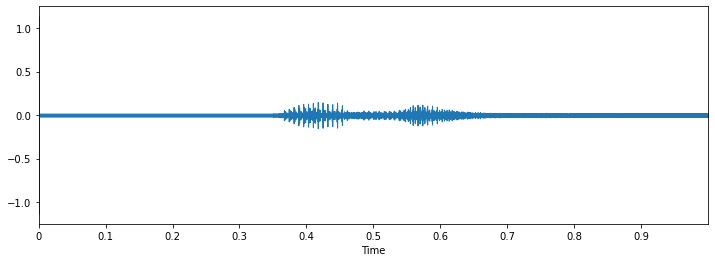

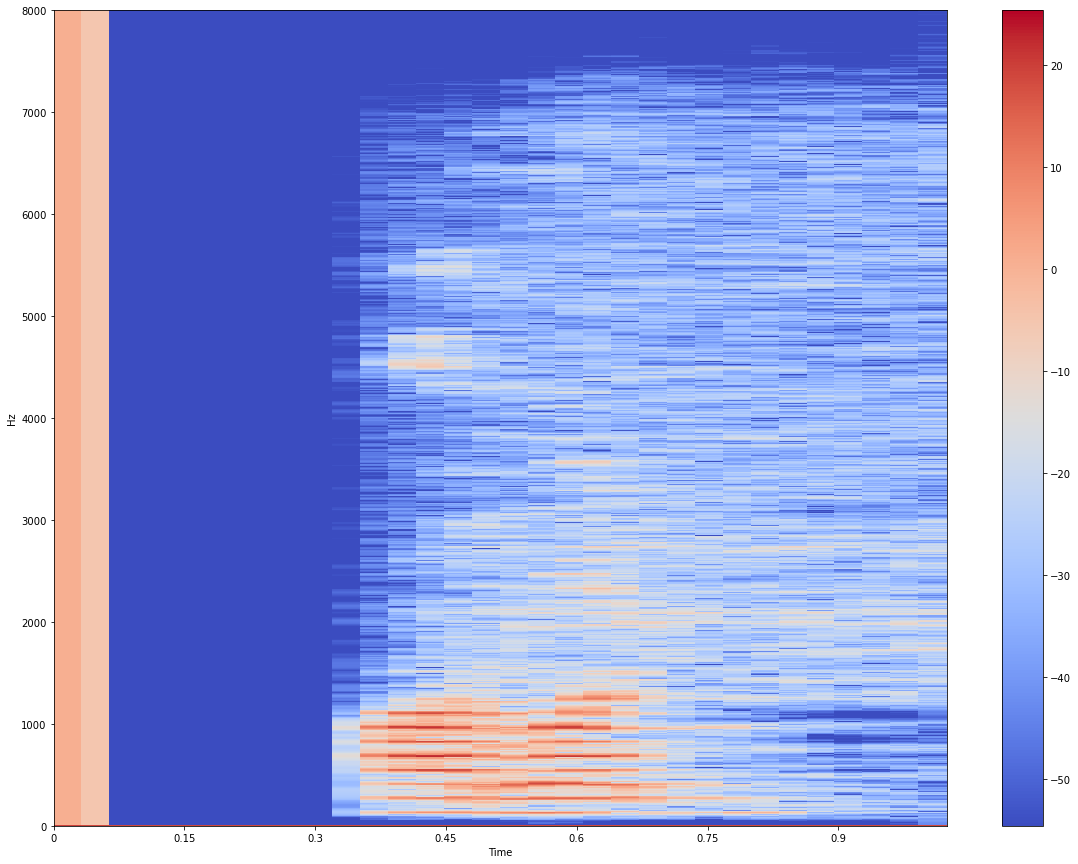

In [21]:
show_plot(back[0])

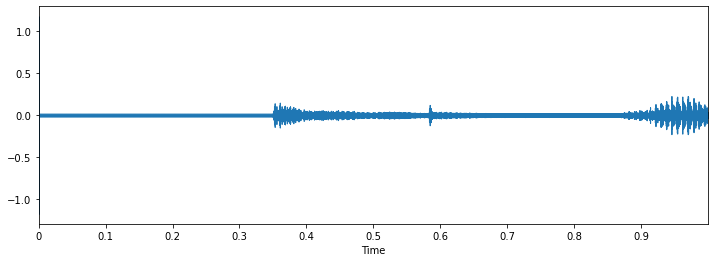

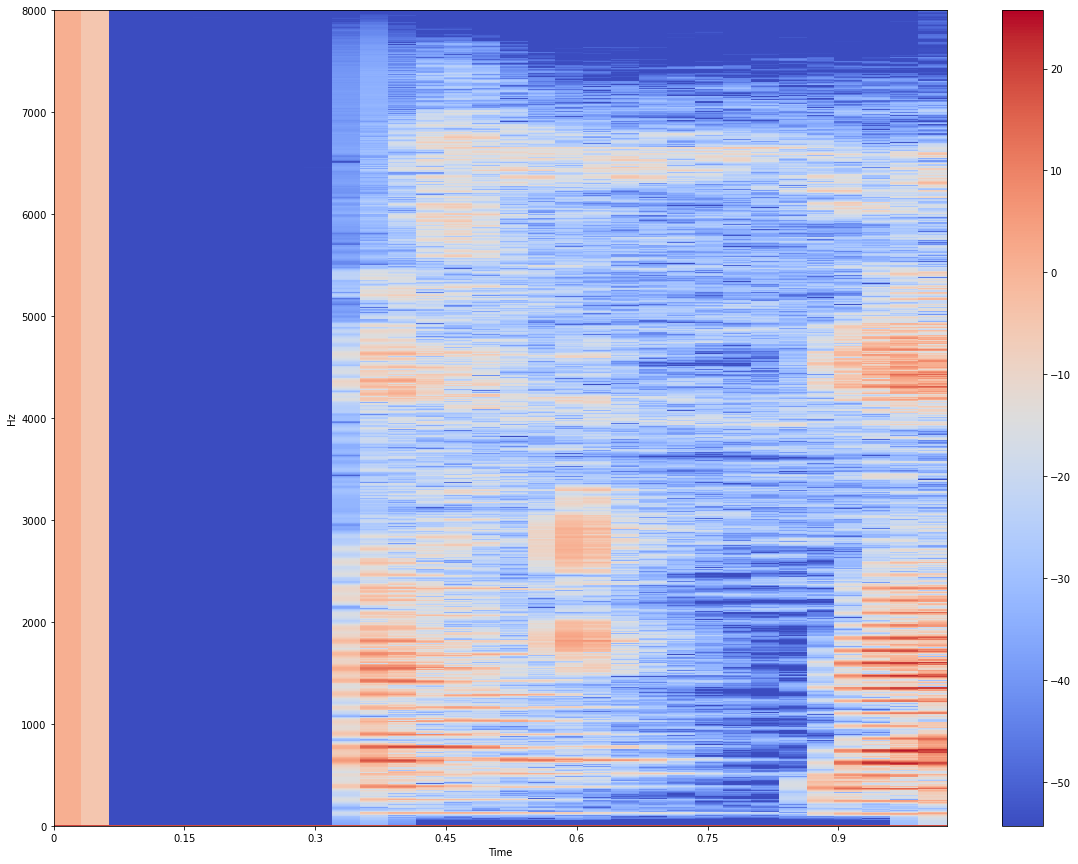

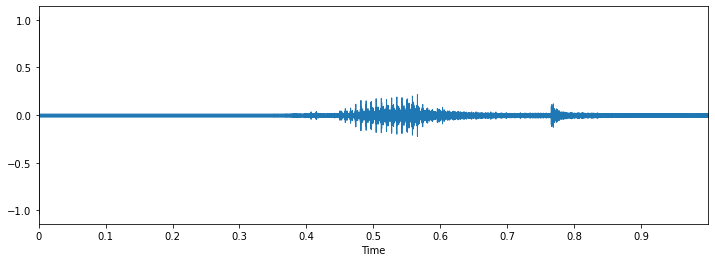

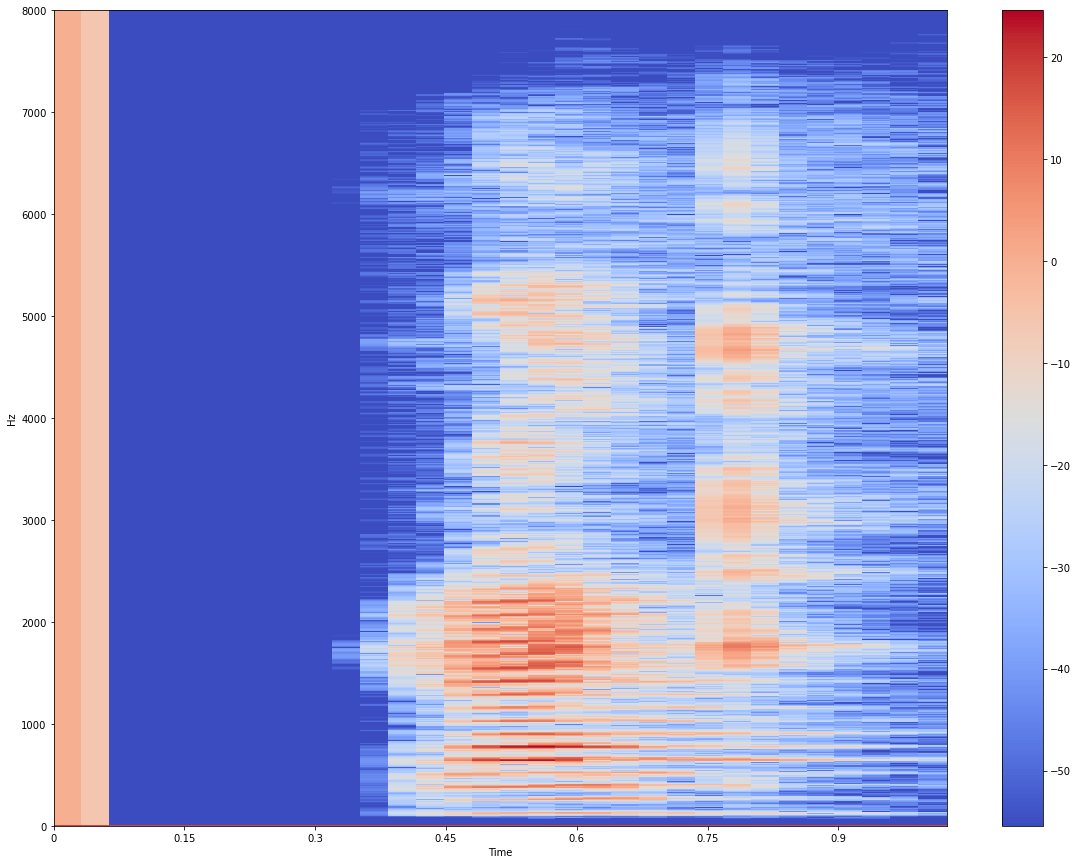

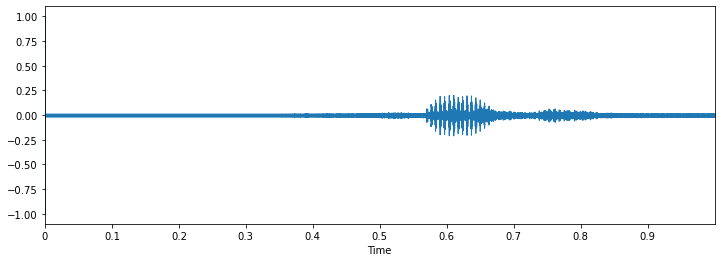

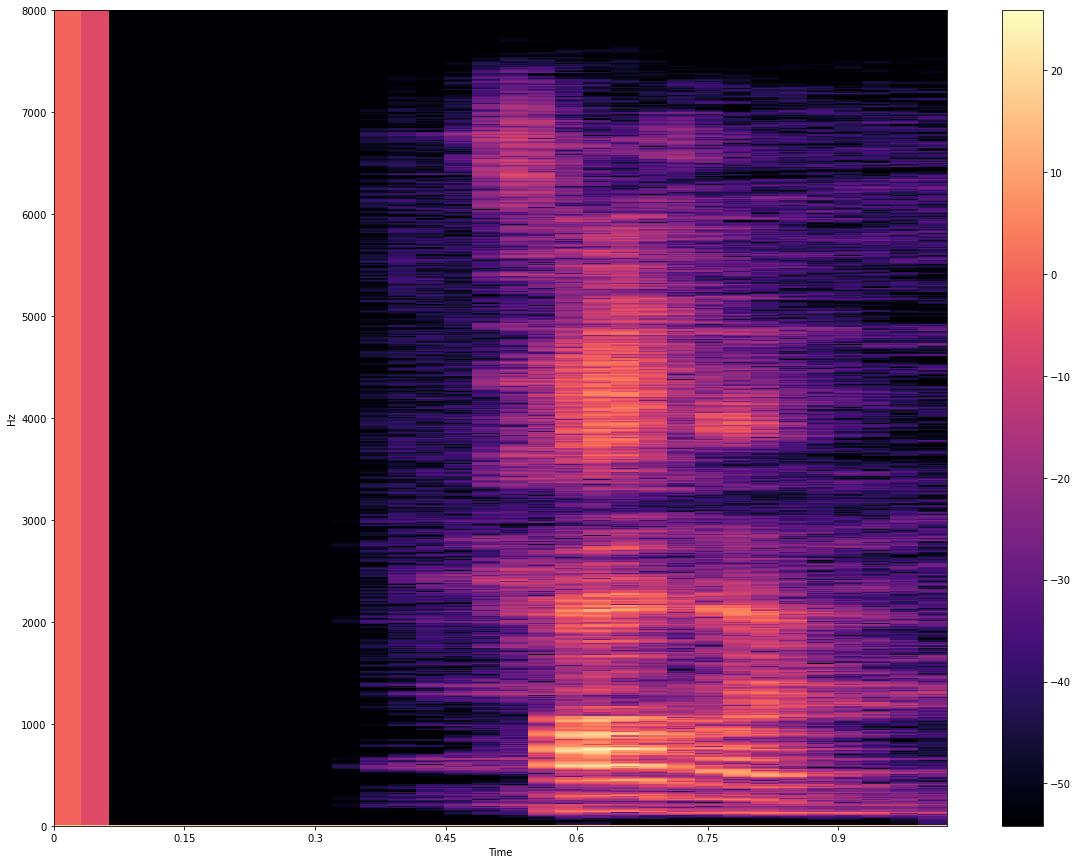

In [22]:
show_plot(left[0])
show_plot(right[0])
show_plot(stop[0])

# Feature Extraction

In [23]:
def mfcc(mylist):
  for samples in mylist: 
    mfcc_sound = librosa.feature.mfcc(y=samples[0], sr=16000, n_mfcc=40)
    samples[0] = np.mean(mfcc_sound.T,axis=0)

In [24]:
mfcc(forward)
mfcc(back)
mfcc(left)
mfcc(right)
mfcc(stop)

In [25]:
def appendItems(listA,listB):
  for items in listA:
    listB.append(items)

In [26]:
appendItems(forward,list_of_sounds)
appendItems(back,list_of_sounds)
appendItems(left,list_of_sounds)
appendItems(right,list_of_sounds)
appendItems(stop,list_of_sounds)

In [27]:
asDataframe  = pd.DataFrame(list_of_sounds,columns=["input","output"])

In [28]:
asDataframe

,input,output
0,"[-426.0587, 10.34419, 4.282278, 14.155941, -35...",Forward
1,"[-454.87753, 23.767302, -5.81475, -12.664465, ...",Forward
2,"[-424.93985, 16.957924, 12.405464, 9.167961, -...",Forward
3,"[-418.84155, 49.753662, 11.714583, 2.8228955, ...",Forward
4,"[-419.70898, 11.155443, -10.141459, -2.5763109...",Forward
...,...,...
397,"[-486.8028, -6.327261, -10.038765, -6.2693663,...",Stop
398,"[-502.23016, 8.391277, -16.068262, -12.630758,...",Stop
399,"[-495.58136, -8.0190735, -14.973534, -4.481054...",Stop
400,"[-464.26617, 10.815628, -9.343833, 19.887568, ...",Stop


# shuffling our data

In [29]:
asDataframe = asDataframe.sample(frac = 1)
asDataframe

,input,output
152,"[-365.95352, 4.1990757, -10.774801, 6.439126, ...",back
281,"[-359.90875, -1.6860349, -14.509829, 3.82999, ...",Right
38,"[-400.87622, 11.628058, -4.0751576, 4.0437756,...",Forward
48,"[-404.23758, 13.633588, -5.1240816, 6.7476845,...",Forward
117,"[-385.3512, 4.1057844, -14.752317, 5.564288, -...",back
...,...,...
176,"[-449.82898, 26.897058, -24.395084, -3.0204349...",Left
145,"[-390.14087, -16.364376, -6.863794, 13.142286,...",back
231,"[-429.36597, 23.923634, -14.816124, 5.287966, ...",Left
318,"[-521.7546, 3.0954733, -5.3432007, 9.919404, -...",Right


In [30]:
#dummy =  np.array(asDataframe.output.tolist())#

In [31]:
#niques, ids = np.unique(dummy, return_inverse=True)

In [32]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

X = np.array(asDataframe.input.tolist())
y = np.array(asDataframe.output.tolist())

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
uniques, ids = np.unique(y, return_inverse=True)
y = to_categorical(ids)


In [33]:
y

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

 # splitting the data

In [34]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 127)

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

num_labels = y.shape[1]
model = Sequential()
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [36]:
num_epochs = 500
num_batch_size = 32
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/500
11/11 [==============================] - 0s 34ms/step - loss: 48.6729 - accuracy: 0.1682 - val_loss: 14.0047 - val_accuracy: 0.1481
Epoch 2/500
11/11 [==============================] - 0s 3ms/step - loss: 34.9834 - accuracy: 0.1869 - val_loss: 4.7930 - val_accuracy: 0.3210
Epoch 3/500
11/11 [==============================] - 0s 4ms/step - loss: 27.2985 - accuracy: 0.2025 - val_loss: 3.5022 - val_accuracy: 0.3086
Epoch 4/500
11/11 [==============================] - 0s 3ms/step - loss: 20.6509 - accuracy: 0.2087 - val_loss: 8.5572 - val_accuracy: 0.2469
Epoch 5/500
11/11 [==============================] - 0s 4ms/step - loss: 18.6246 - accuracy: 0.2212 - val_loss: 1.8238 - val_accuracy: 0.4938
Epoch 6/500
11/11 [==============================] - 0s 3ms/step - loss: 14.8488 - accuracy: 0.1931 - val_loss: 1.4782 - val_accuracy: 0.3086
Epoch 7/500
11/11 [==============================] - 0s 4ms/step - loss: 10.9262 - accuracy: 0.2181 - val_loss: 2.0389 - val_accuracy: 0.2963
Epoc

Epoch 59/500
11/11 [==============================] - 0s 3ms/step - loss: 1.6347 - accuracy: 0.2617 - val_loss: 1.6164 - val_accuracy: 0.1481
Epoch 60/500
11/11 [==============================] - 0s 4ms/step - loss: 1.6523 - accuracy: 0.2087 - val_loss: 1.6167 - val_accuracy: 0.1481
Epoch 61/500
11/11 [==============================] - 0s 4ms/step - loss: 1.6509 - accuracy: 0.2274 - val_loss: 1.6166 - val_accuracy: 0.1481
Epoch 62/500
11/11 [==============================] - 0s 4ms/step - loss: 1.6288 - accuracy: 0.1963 - val_loss: 1.6163 - val_accuracy: 0.1481
Epoch 63/500
11/11 [==============================] - 0s 4ms/step - loss: 1.6566 - accuracy: 0.2087 - val_loss: 1.6165 - val_accuracy: 0.1481
Epoch 64/500
11/11 [==============================] - 0s 4ms/step - loss: 1.6449 - accuracy: 0.2305 - val_loss: 1.6169 - val_accuracy: 0.1481
Epoch 65/500
11/11 [==============================] - 0s 4ms/step - loss: 1.6605 - accuracy: 0.2243 - val_loss: 1.6172 - val_accuracy: 0.1481
Epoch 

11/11 [==============================] - 0s 3ms/step - loss: 1.6108 - accuracy: 0.2087 - val_loss: 1.6217 - val_accuracy: 0.1481
Epoch 117/500
11/11 [==============================] - 0s 3ms/step - loss: 1.5968 - accuracy: 0.2461 - val_loss: 1.5903 - val_accuracy: 0.1728
Epoch 118/500
11/11 [==============================] - 0s 3ms/step - loss: 1.5818 - accuracy: 0.2555 - val_loss: 1.6076 - val_accuracy: 0.1481
Epoch 119/500
11/11 [==============================] - 0s 4ms/step - loss: 1.6472 - accuracy: 0.2274 - val_loss: 1.6205 - val_accuracy: 0.1481
Epoch 120/500
11/11 [==============================] - 0s 3ms/step - loss: 1.6146 - accuracy: 0.2243 - val_loss: 1.6225 - val_accuracy: 0.1481
Epoch 121/500
11/11 [==============================] - 0s 5ms/step - loss: 1.6244 - accuracy: 0.2305 - val_loss: 1.6223 - val_accuracy: 0.1481
Epoch 122/500
11/11 [==============================] - 0s 4ms/step - loss: 1.6413 - accuracy: 0.2368 - val_loss: 1.6197 - val_accuracy: 0.1481
Epoch 123/500

11/11 [==============================] - 0s 5ms/step - loss: 1.5450 - accuracy: 0.2773 - val_loss: 1.3823 - val_accuracy: 0.4198
Epoch 174/500
11/11 [==============================] - 0s 4ms/step - loss: 1.4965 - accuracy: 0.2835 - val_loss: 1.3668 - val_accuracy: 0.4074
Epoch 175/500
11/11 [==============================] - 0s 3ms/step - loss: 1.4969 - accuracy: 0.3053 - val_loss: 1.3697 - val_accuracy: 0.4198
Epoch 176/500
11/11 [==============================] - 0s 3ms/step - loss: 1.5206 - accuracy: 0.2866 - val_loss: 1.3945 - val_accuracy: 0.3951
Epoch 177/500
11/11 [==============================] - 0s 3ms/step - loss: 1.5022 - accuracy: 0.3146 - val_loss: 1.3603 - val_accuracy: 0.4074
Epoch 178/500
11/11 [==============================] - 0s 3ms/step - loss: 1.5099 - accuracy: 0.3053 - val_loss: 1.3364 - val_accuracy: 0.4074
Epoch 179/500
11/11 [==============================] - 0s 3ms/step - loss: 1.5430 - accuracy: 0.2430 - val_loss: 1.4497 - val_accuracy: 0.3457
Epoch 180/500

11/11 [==============================] - 0s 3ms/step - loss: 1.3911 - accuracy: 0.3769 - val_loss: 1.1637 - val_accuracy: 0.5556
Epoch 231/500
11/11 [==============================] - 0s 3ms/step - loss: 1.3591 - accuracy: 0.3583 - val_loss: 1.1655 - val_accuracy: 0.4444
Epoch 232/500
11/11 [==============================] - 0s 3ms/step - loss: 1.3594 - accuracy: 0.3645 - val_loss: 1.1674 - val_accuracy: 0.4321
Epoch 233/500
11/11 [==============================] - 0s 3ms/step - loss: 1.3272 - accuracy: 0.3988 - val_loss: 1.1466 - val_accuracy: 0.4198
Epoch 234/500
11/11 [==============================] - 0s 3ms/step - loss: 1.3645 - accuracy: 0.3988 - val_loss: 1.1475 - val_accuracy: 0.4938
Epoch 235/500
11/11 [==============================] - 0s 3ms/step - loss: 1.3183 - accuracy: 0.3925 - val_loss: 1.2062 - val_accuracy: 0.4938
Epoch 236/500
11/11 [==============================] - 0s 3ms/step - loss: 1.3541 - accuracy: 0.3894 - val_loss: 1.1850 - val_accuracy: 0.5185
Epoch 237/500

11/11 [==============================] - 0s 3ms/step - loss: 0.7225 - accuracy: 0.6885 - val_loss: 0.3919 - val_accuracy: 0.8765
Epoch 287/500
11/11 [==============================] - 0s 3ms/step - loss: 0.7269 - accuracy: 0.7134 - val_loss: 0.4588 - val_accuracy: 0.8025
Epoch 288/500
11/11 [==============================] - 0s 3ms/step - loss: 0.7929 - accuracy: 0.6636 - val_loss: 0.4276 - val_accuracy: 0.8642
Epoch 289/500
11/11 [==============================] - 0s 3ms/step - loss: 0.7674 - accuracy: 0.6885 - val_loss: 0.4028 - val_accuracy: 0.8642
Epoch 290/500
11/11 [==============================] - 0s 3ms/step - loss: 0.7024 - accuracy: 0.7321 - val_loss: 0.3943 - val_accuracy: 0.8519
Epoch 291/500
11/11 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.7539 - val_loss: 0.3517 - val_accuracy: 0.8889
Epoch 292/500
11/11 [==============================] - 0s 3ms/step - loss: 0.6116 - accuracy: 0.7477 - val_loss: 0.3394 - val_accuracy: 0.8395
Epoch 293/500

11/11 [==============================] - 0s 3ms/step - loss: 0.2564 - accuracy: 0.9003 - val_loss: 0.2279 - val_accuracy: 0.9136
Epoch 344/500
11/11 [==============================] - ETA: 0s - loss: 0.1823 - accuracy: 0.93 - 0s 3ms/step - loss: 0.2967 - accuracy: 0.8941 - val_loss: 0.2224 - val_accuracy: 0.9259
Epoch 345/500
11/11 [==============================] - 0s 3ms/step - loss: 0.2205 - accuracy: 0.9159 - val_loss: 0.2301 - val_accuracy: 0.9259
Epoch 346/500
11/11 [==============================] - 0s 4ms/step - loss: 0.2018 - accuracy: 0.9252 - val_loss: 0.2169 - val_accuracy: 0.9259
Epoch 347/500
11/11 [==============================] - 0s 3ms/step - loss: 0.2098 - accuracy: 0.9159 - val_loss: 0.2116 - val_accuracy: 0.9383
Epoch 348/500
11/11 [==============================] - 0s 3ms/step - loss: 0.2461 - accuracy: 0.9034 - val_loss: 0.2046 - val_accuracy: 0.9506
Epoch 349/500
11/11 [==============================] - 0s 3ms/step - loss: 0.2018 - accuracy: 0.9439 - val_loss: 0

11/11 [==============================] - 0s 3ms/step - loss: 0.1988 - accuracy: 0.9252 - val_loss: 0.2490 - val_accuracy: 0.9136
Epoch 401/500
11/11 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.9159 - val_loss: 0.2268 - val_accuracy: 0.9383
Epoch 402/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1975 - accuracy: 0.9315 - val_loss: 0.2259 - val_accuracy: 0.9136
Epoch 403/500
11/11 [==============================] - 0s 3ms/step - loss: 0.2271 - accuracy: 0.9034 - val_loss: 0.2422 - val_accuracy: 0.9383
Epoch 404/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1905 - accuracy: 0.9346 - val_loss: 0.2637 - val_accuracy: 0.9259
Epoch 405/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1720 - accuracy: 0.9502 - val_loss: 0.2366 - val_accuracy: 0.9383
Epoch 406/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1662 - accuracy: 0.9502 - val_loss: 0.2464 - val_accuracy: 0.9383
Epoch 407/500

Epoch 457/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1319 - accuracy: 0.9439 - val_loss: 0.3018 - val_accuracy: 0.9259
Epoch 458/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1705 - accuracy: 0.9439 - val_loss: 0.2597 - val_accuracy: 0.9383
Epoch 459/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1695 - accuracy: 0.9470 - val_loss: 0.2978 - val_accuracy: 0.9383
Epoch 460/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1351 - accuracy: 0.9533 - val_loss: 0.3262 - val_accuracy: 0.9136
Epoch 461/500
11/11 [==============================] - 0s 4ms/step - loss: 0.1351 - accuracy: 0.9408 - val_loss: 0.3312 - val_accuracy: 0.9259
Epoch 462/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1316 - accuracy: 0.9408 - val_loss: 0.3134 - val_accuracy: 0.9259
Epoch 463/500
11/11 [==============================] - 0s 3ms/step - loss: 0.1423 - accuracy: 0.9470 - val_loss: 0.2964 - val_accuracy: 0.9383

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               10496     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1

In [38]:
y_pred = np.around(model.predict(x_test))

In [39]:
y_pred = uniques[y_pred.argmax(1)]
y_pred = label_encoder.inverse_transform(y_pred)
y_pred

array(['Stop', 'Stop', 'Stop', 'Forward', 'Forward', 'Forward', 'back',
       'Forward', 'Forward', 'Forward', 'Left', 'Forward', 'Forward',
       'Stop', 'Left', 'Stop', 'Forward', 'back', 'Forward', 'Left',
       'Stop', 'Right', 'Stop', 'Forward', 'Right', 'back', 'Right',
       'back', 'Right', 'Stop', 'Left', 'back', 'back', 'back', 'back',
       'Stop', 'Right', 'Stop', 'Forward', 'Forward', 'Right', 'Stop',
       'Left', 'Stop', 'back', 'Stop', 'Left', 'Right', 'Left', 'Forward',
       'Right', 'Right', 'back', 'Forward', 'back', 'back', 'Left',
       'back', 'Right', 'Stop', 'Stop', 'Right', 'Stop', 'back', 'Left',
       'Forward', 'Left', 'Right', 'back', 'back', 'Forward', 'Left',
       'back', 'Forward', 'back', 'Stop', 'Left', 'back', 'Right', 'Stop',
       'Forward'], dtype='<U7')

In [40]:
original = uniques[y_test.argmax(1)]
original = label_encoder.inverse_transform(original)


In [41]:
from sklearn import metrics
print(metrics.confusion_matrix(original, y_pred))

[[16  0  0  0  0]
 [ 0 11  1  0  0]
 [ 0  1 11  0  0]
 [ 2  0  1 18  0]
 [ 1  0  0  0 19]]


In [42]:
print(metrics.accuracy_score(original, y_pred))

0.9259259259259259


# testing for user input

In [43]:
import sounddevice as sd
import scipy
import wavio
import time
import winsound as win

sampling_rate = 16000
duration = 1
def record():
    
    print("recording will start in 5 seconds")
    k = 4
    for j in range(0,4):
        print("in ",k,"seconds")
        time.sleep(1)
        k = k-1

    print("speak after the beeps")
    win.Beep(1000,1000)
    recording = sd.rec(sampling_rate*duration, samplerate=sampling_rate,channels=1)
    sd.wait()
    wavio.write("outputs/output.wav", recording, sampling_rate,sampwidth=2)
    recording ,sr= librosa.load("outputs/output.wav",sr=16000,res_type = 'kaiser_fast')
    return recording
    


In [44]:
def listen_predict():
    audio = record()
    audio = normalize(audio)
    audio = librosa.effects.preemphasis(audio)
    mfcc_sound = librosa.feature.mfcc(y=audio, sr=16000, n_mfcc=40)
    audio = np.mean(mfcc_sound.T,axis=0)
    answer = model.predict(np.array([audio]))
    answer = np.around(answer)
    answer = uniques[answer.argmax(1)]
    answer = label_encoder.inverse_transform(answer)
    print(answer)

In [47]:
listen_predict()

recording will start in 5 seconds
in  4 seconds
in  3 seconds
in  2 seconds
in  1 seconds
speak after the beeps
['Stop']
